<a href="https://colab.research.google.com/github/Jithinkg/datascience/blob/master/fruitclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai import *
from imutils import paths

In [0]:
!pip install imutils

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
classes=['apples','mango','grapes','orange']

In [0]:
path = Path('/content/drive/My Drive/classification')

In [0]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),bs=2,size=224,num_workers=5).normalize(imagenet_stats)

In [0]:
data.classes

['apples', 'grapes', 'mango', 'orange']

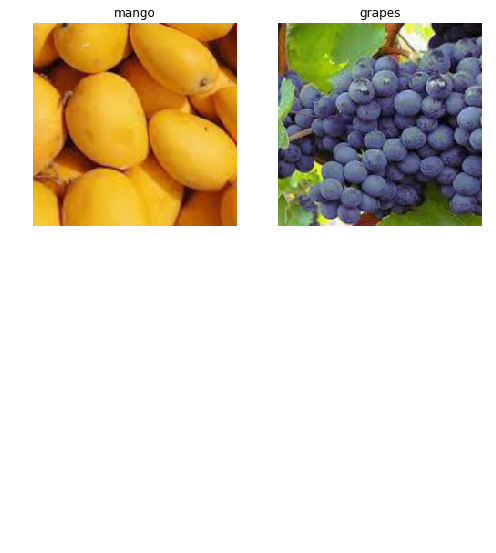

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apples', 'grapes', 'mango', 'orange'], 4, 32, 8)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 21528331.58it/s]


In [0]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.155886,1.689976,0.125000,00:01
1,1.735134,0.926202,0.500000,00:01
2,1.532014,0.576336,0.750000,00:01
3,1.353146,0.631657,0.750000,00:01
4,1.229554,0.615996,0.750000,00:01
5,1.222117,0.555289,0.750000,00:01


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.935457,0.646695,0.750000,00:01
1,0.874051,0.529570,0.750000,00:01
2,1.025027,0.478731,0.875000,00:01
3,1.051509,0.383433,1.000000,00:01
4,1.062189,1.804925,0.250000,00:01
5,1.160868,1.417969,0.250000,00:01
6,1.114348,1.083084,0.625000,00:01
7,1.063007,0.766392,0.500000,00:01
8,1.214216,0.814496,0.625000,00:01
9,1.196389,0.954883,0.750000,00:01


In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

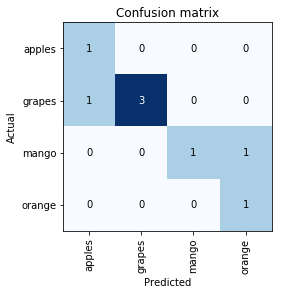

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
learn = load_learner(path)

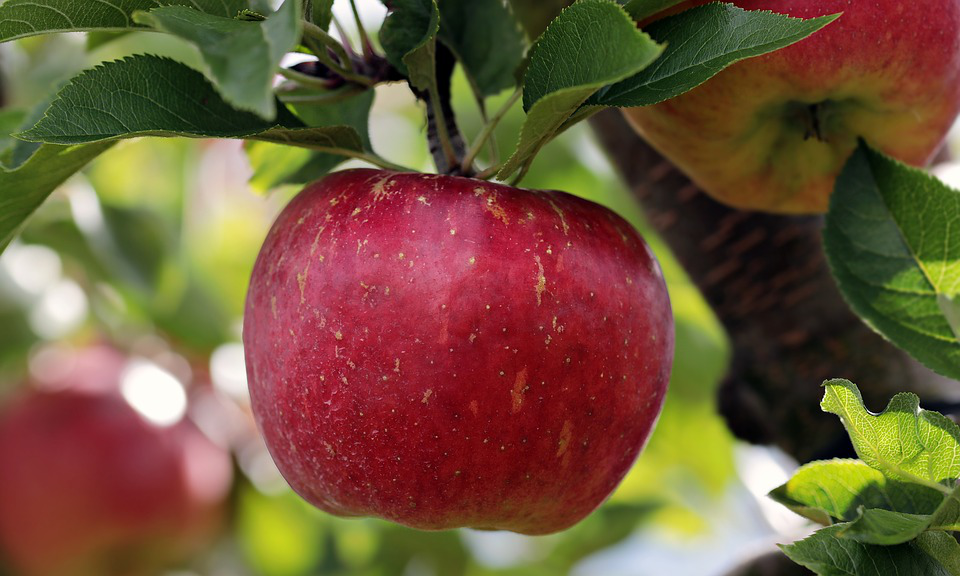

In [0]:
img = open_image('/content/drive/My Drive/classification/appletest.jpg')
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category apples